In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

def dates2num(dates_in):
    dates_out = []
    for period in dates_in:
        year = float(period.split('/')[1])
        month = float(period.split('/')[0])
        dates_out.append(year+month/12)
    return np.asarray(dates_out)

In [2]:
NHSdata = np.load('NHSwaiting.npy', allow_pickle=True)
names = NHSdata[0]
dates = dates2num(NHSdata[1])
attendance = NHSdata[2]
waiting = NHSdata[3]

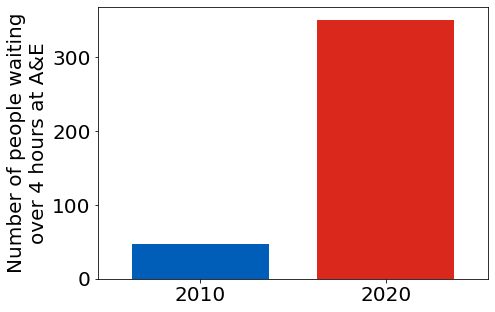

303086


In [3]:
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rc('font', size=20)

fig, ax1 = plt.subplots(figsize = (7,5))
time = np.arange(2010.25, 2020, 0.25)[::-1]

hospital = 0 

allBeds = waiting[hospital,:][waiting[hospital,:]!='-']

ax1.bar([time[-1], time[0]], [allBeds[-1]*1e-3, allBeds[0]*1e-3], 
        width = 7, alpha=1,tick_label = [2010, 2020], color = ['#005EB8', '#DA291C'])
ax1.set_xlim(2005, 2025)

ax1.set_ylabel("Number of people waiting\nover 4 hours at A&E")
plt.show()
print(allBeds[0]-allBeds[-1])

In [42]:
waiting = NHSdata[3]


change = np.asarray(["-"]*len(waiting), dtype = "object")

for i, waiting_i in enumerate(waiting):
    if waiting_i[0] != "-" and waiting_i[1] != "-":
        change[i] = waiting_i[0] - waiting_i[1]
        
top_five_changes = np.sort(change[change != "-"])[::-1][1:6]

top_five_names = []

for i, item in enumerate(top_five_changes):
    new_name = names[change == item][0]
    top_five_names.append(new_name)
    print(i+1, new_name)


1 University Hospitals Of Leicester NHS Trust
2 University Hospitals Birmingham NHS Foundation Trust
3 North West Anglia NHS Foundation Trust
4 University Hospitals Of Derby And Burton NHS Foundation Trust
5 Gloucestershire Hospitals NHS Foundation Trust


In [51]:
def makeURL(name):
    url_prefix = '-'.join(name.lower().split(' '))
    url = ''.join(["hospitals/",url_prefix,".html"])
    url = url.replace(',', '') 
    return url

In [54]:
for i,name in enumerate(top_five_names):
    url = "www.howsmynhs.co.uk/" + makeURL(name)
    tweet = '''
    # {}: {}
    
    {} more people waiting over four hours at A&E compared to last month.
    
    {}
    '''.format(i+1, name, change[names == name][0], url)
    print(tweet)


    # 1: University Hospitals Of Leicester NHS Trust
    
    2559 more people waiting over four hours at A&E compared to last month.
    
    www.howsmynhs.co.uk/hospitals/university-hospitals-of-leicester-nhs-trust.html
    

    # 2: University Hospitals Birmingham NHS Foundation Trust
    
    1727 more people waiting over four hours at A&E compared to last month.
    
    www.howsmynhs.co.uk/hospitals/university-hospitals-birmingham-nhs-foundation-trust.html
    

    # 3: North West Anglia NHS Foundation Trust
    
    1630 more people waiting over four hours at A&E compared to last month.
    
    www.howsmynhs.co.uk/hospitals/north-west-anglia-nhs-foundation-trust.html
    

    # 4: University Hospitals Of Derby And Burton NHS Foundation Trust
    
    1375 more people waiting over four hours at A&E compared to last month.
    
    www.howsmynhs.co.uk/hospitals/university-hospitals-of-derby-and-burton-nhs-foundation-trust.html
    

    # 5: Gloucestershire Hospitals NHS Foun